In [1]:
import dlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython import display

In [10]:
from google.colab import files
uploaded = files.upload()

Saving VID20201104153229.mp4 to VID20201104153229.mp4


In [11]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

VID20201104153229.mp4


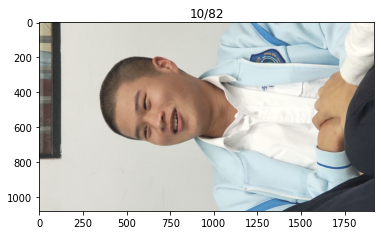

In [12]:
# 看一下影片 frames
First_tracking_frame = 1
End_tracking_frame =  10 
cap = cv2.VideoCapture(fname)
total_frames = int(cap.get(7))
print('No. of frames = ', total_frames)
frame_count = 1
while(cap.isOpened()):  
    if(frame_count > End_tracking_frame):
        break
    success, frame = cap.read()  # Capture frame-by-frame
    if success == True:
        # 先把 frame 轉到 First_tracking_frame, show 出此 frame 上 subject index
        if(frame_count < First_tracking_frame):
            frame_count += 1
        else:
            display.clear_output(wait=True)
            plt.title(str(frame_count)+'/'+str(total_frames))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert to RGB
            plt.imshow(frame)
            plt.show()
            plt.pause(0.1)
            frame_count = frame_count + 1
cap.release()


https://github.com/codeniko/shape_predictor_81_face_landmarks

In [6]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")

In [13]:
End_tracking_frame = 100

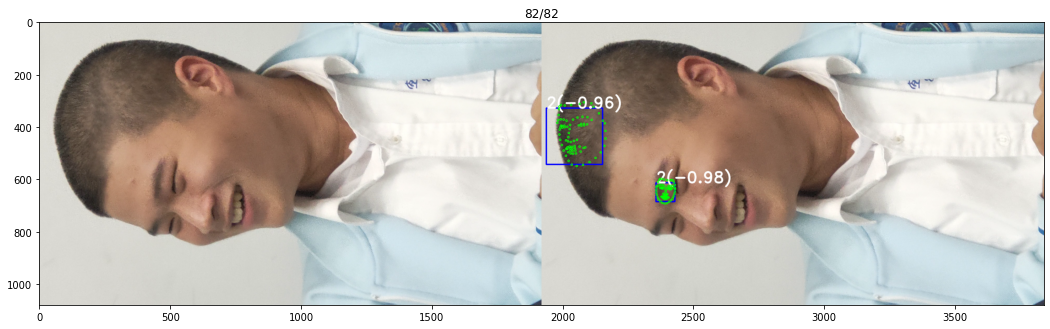

82 frames were read


In [14]:
cap = cv2.VideoCapture(fname)
total_frames = int(cap.get(7))
print('No. of frames = ', total_frames)
frame_count = 1
while(cap.isOpened()):  # Read until video is completed
    success, frame = cap.read()  # Capture frame-by-frame
    if success == True:
        display.clear_output(wait=True)
        plt.figure(figsize=(18,12)) 
        plt.title(str(frame_count)+'/'+str(total_frames))
        img0 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert to RGB
        img = np.copy(img0)
        face_rects, scores, idx = detector.run(img, 0, -1)
        
        # show box and score on image
        for i, face_rect in enumerate(face_rects):
            x1 = face_rect.left()
            y1 = face_rect.top()
            x2 = face_rect.right()
            y2 = face_rect.bottom()
            text = "%d(%2.2f)" % (idx[i]+1, scores[i])
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 4, cv2.LINE_AA)
            cv2.putText(img, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 255), 3, cv2.LINE_AA)

        # show landmarks on image
        for face_rect in face_rects:
            shape = predictor(img, face_rect)
            for num in range(shape.num_parts):
                cv2.circle(img, (shape.parts()[num].x, shape.parts()[num].y), 3, (0,255,0), 2) 
        img1 = np.append(img0, img, axis=1)#把 2 張 img 接起來
        plt.imshow(img1)
        plt.pause(0.1)
        frame_count = frame_count + 1
        if(frame_count > End_tracking_frame):
            break
    else:
        break
print(frame_count-1, 'frames were read')
cap.release()